In [1]:
library(tidyverse)
library(repr)
#library(tidymodels)
options(repr.matrix.max.rows = 6)
#library(ggplot2)
library(cowplot)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# why is dose 2 more than dose 1
# why there is no description of the column names 
# why dose dose 1 look wired

In [2]:
data <- read_csv("abc/newvaccine.csv")
data

Rows: 74676 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): prename, prfname, sex, age, numtotal_atleast1dose, numtotal_parti...
dbl   (4): pruid, numtotal_additional, numtotal_2nd_additional, numtotal_rec...
date  (1): week_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prename,prfname,week_end,sex,age,numtotal_atleast1dose,numtotal_partially,numtotal_fully,numtotal_additional,numtotal_2nd_additional,numtotal_recent_fullyoradditional,proptotal_atleast1dose,proptotal_partially,proptotal_fully,proptotal_additional,proptotal_2nd_additional,proptotal_recent_fullyoradditional
<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Canada,Canada,2020-12-19,All sexes,0–15,2,2,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,16–69,11766,11766,0,NA,NA,NA,0.1,0.1,0,NA,NA,NA
1,Canada,Canada,2020-12-19,All sexes,70–74,174,174,0,NA,NA,NA,<0.1,<0.1,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,Nunavut,Nunavut,2022-11-06,Not reported,All ages,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-11-06,Not reported,Not reported,0,0,0.0,0,0,NA,na,na,na,na,na,na
62,Nunavut,Nunavut,2022-11-06,Not reported,Unknown,0,0,0.0,0,0,NA,na,na,na,na,na,na


In [41]:
data_allsex_canada<- data|>
filter(prename=="Canada")|>
filter(sex=="All sexes")|>
filter(age=="All ages")|>
mutate(numtotal_atleast1dose=as.numeric(numtotal_atleast1dose))|>
mutate(numtotal_fully=as.numeric(numtotal_fully))|>
mutate(numtotal_additional=as.numeric(numtotal_additional))|>
mutate(numtotal_partially=as.numeric(numtotal_partially))

data2<-data_allsex_canada |> 
    select(week_end:numtotal_recent_fullyoradditional, -sex)

In [42]:
newdata<- data2|>
    mutate(days=as.numeric(week_end)-18615)|>
    select(-week_end)

In [43]:
newnewdata <- newdata|>
mutate(days=days)|>
mutate(numtotal_atleast1dose=as.vector(numtotal_atleast1dose))|>
mutate(dose1=as.vector(numtotal_partially))|>
mutate(dose2=as.vector(numtotal_fully))|>
mutate(dose3=as.vector(numtotal_additional))|>
mutate(dose4=as.vector(numtotal_2nd_additional))|>
mutate(dose5=as.vector(numtotal_recent_fullyoradditional))|>
select(-numtotal_recent_fullyoradditional,-numtotal_2nd_additional,-numtotal_fully,-numtotal_partially,-numtotal_additional)
newnewdata

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All ages,12362,0,12362,0,NA,NA,NA
All ages,46171,7,46171,0,NA,NA,NA
All ages,82516,14,82516,0,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32285765,631,2709481,24234375,19161162,4214877,6649685
All ages,32321719,659,2699051,24262770,19300911,5608354,6686327
All ages,32355994,687,2676211,24302196,19459403,7274231,7741196


In [44]:
na_row_total<- nrow(newnewdata[is.na(newnewdata$numtotal_atleast1dose),])
na_row_total
na_row_1<- nrow(newnewdata[is.na(newnewdata$dose1),])
na_row_1
na_row_2<- nrow(newnewdata[is.na(newnewdata$dose2),])
na_row_2
na_row_3<- nrow(newnewdata[is.na(newnewdata$dose3),])
na_row_3
na_row_4<- nrow(newnewdata[is.na(newnewdata$dose4),])
na_row_4
na_row_5<- nrow(newnewdata[is.na(newnewdata$dose5),])
na_row_5

[1] 0

[1] 0

[1] 0

[1] 51

[1] 56

[1] 74

In [45]:
newdata18<-newnewdata|>filter(age=="18–29")
newdata18

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [46]:
#a<- ggplot(newnewdata, aes(x=days,y=dose3))+
#geom_point(aes(color=age))+
#stat_smooth(method='lm',formula='dose3~days',se=FALSE)

#dose3~1750000*days^0.27
#newnewdata<-newnewdata|>filter(age=='All ages')
fit<-lm(dose3~log(days),data=newnewdata)
beta<-coef(fit)
predict_y_nonlinearly<-function(beta, x) {
beta[1]+beta[2]*exp(-beta[3]*x)}

a_nonlinearmodel <- function(beta, x, y){
    yhat<-predict_y_nonlinearly(beta, x)
    sum((y-yhat)^2)}

beta<- optim(rnorm(3), a_nonlinearmodel, method='L-BFGS-B', x=newnewdata$days, y=newnewdata$dose3,
     lower=c(-Inf,-Inf,1e-5),
     upper=c(Inf,Inf,Inf) )$par

newnewdata$yhat<-predict_y_nonlinearly(beta,newnewdata$days)

ggplot(data=newnewdata)+
geom_point(aes(days,dose3))+
geom_line(aes(days, yhat))

ERROR: Error in optim(rnorm(3), a_nonlinearmodel, method = "L-BFGS-B", x = newnewdata$days, : L-BFGS-B needs finite values of 'fn'


Warning message:
“Removed 51 rows containing missing values (geom_point).”


Nonlinear regression model
  model: dose3 ~ c * days^z
   data: newnewdata
        c         z 
13390.444     1.142 
 residual sum-of-squares: 4.055e+14

Number of iterations to convergence: 34 
Achieved convergence tolerance: 4.586e-06

Warning message:
“Removed 51 rows containing missing values (geom_point).”


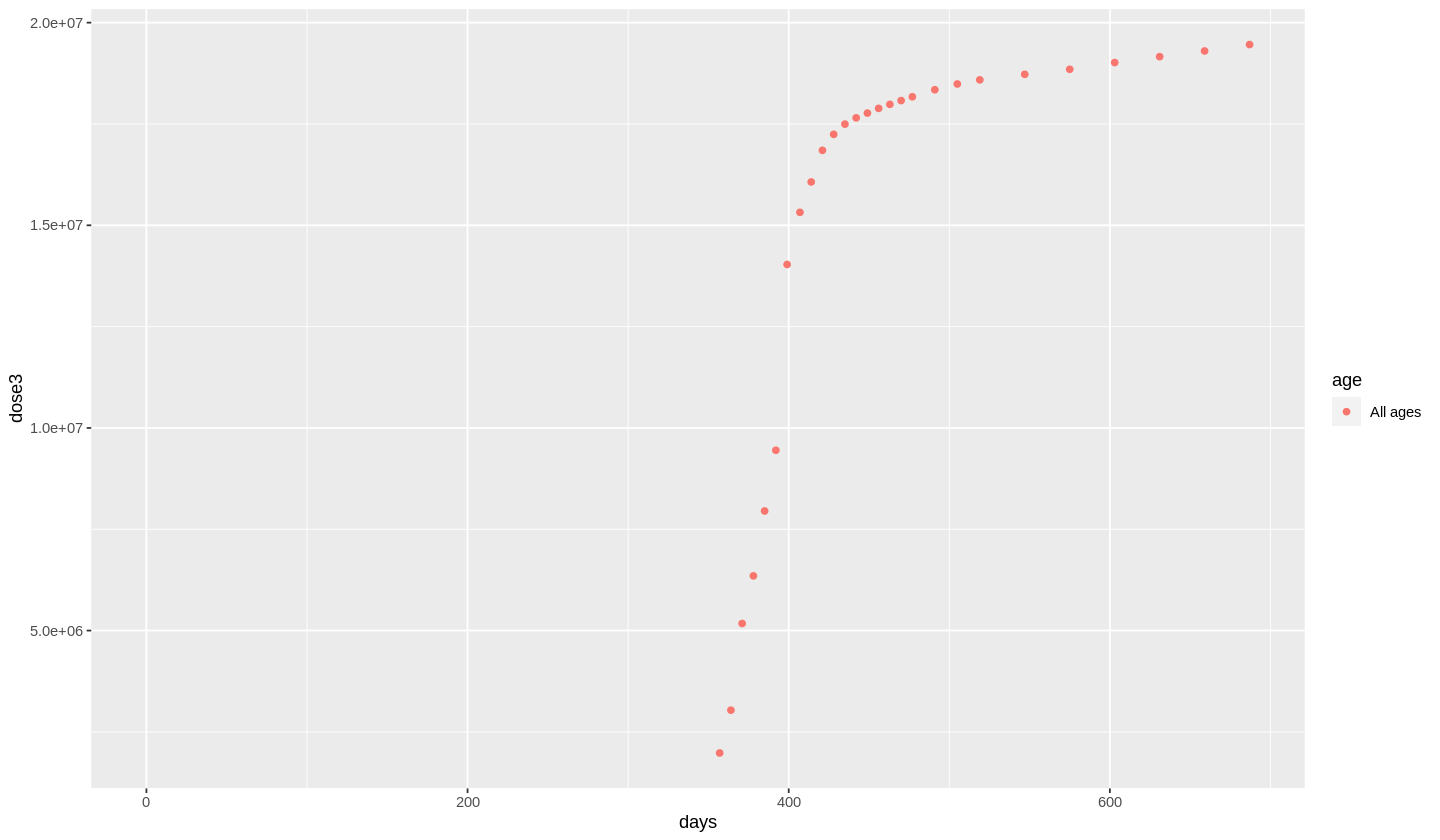

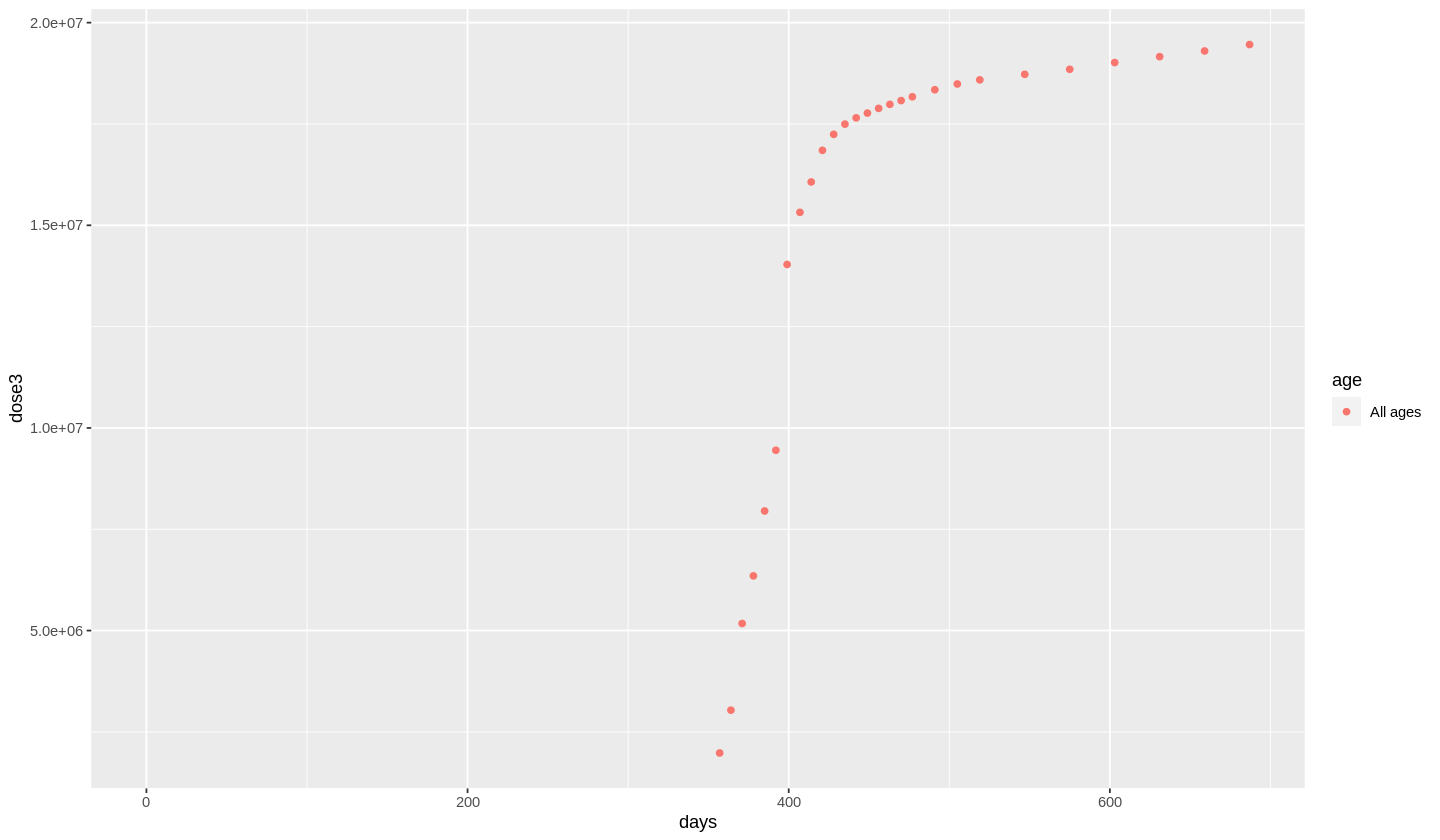

In [47]:
ggplot(newnewdata, aes(x=days,y=dose3))+
geom_point(aes(color=age))

sa1<- nls(dose3~c*days^z, data=newnewdata, start=c(c=1750000, z=0.27))
sa1

ggplot(newnewdata, aes(x=days,y=dose3))+
geom_point(aes(color=age))

#sa2<-lm(log(dose3)~log(days), data=newnewdata)
#sa2

## dose 1

integer(0)

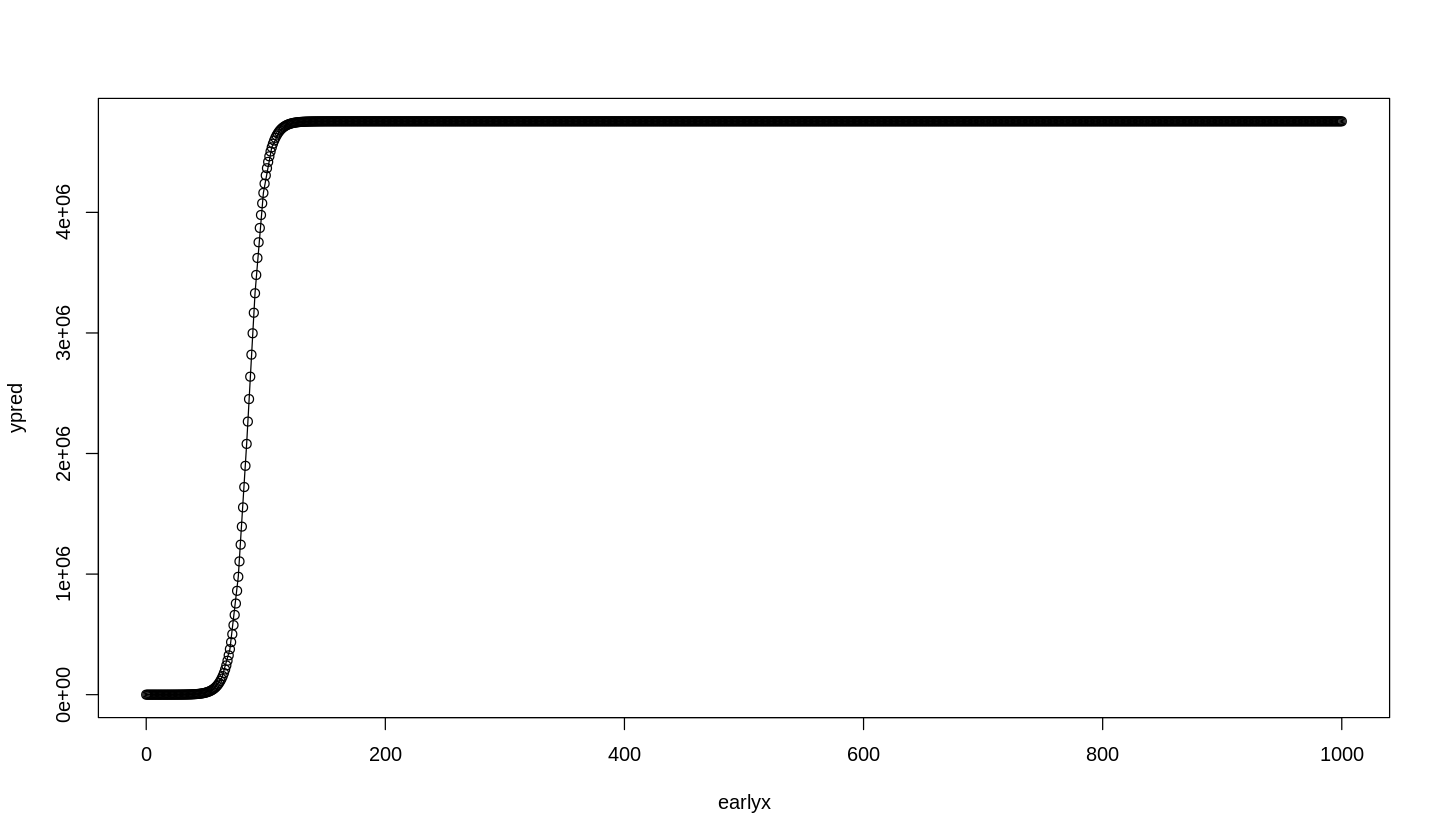

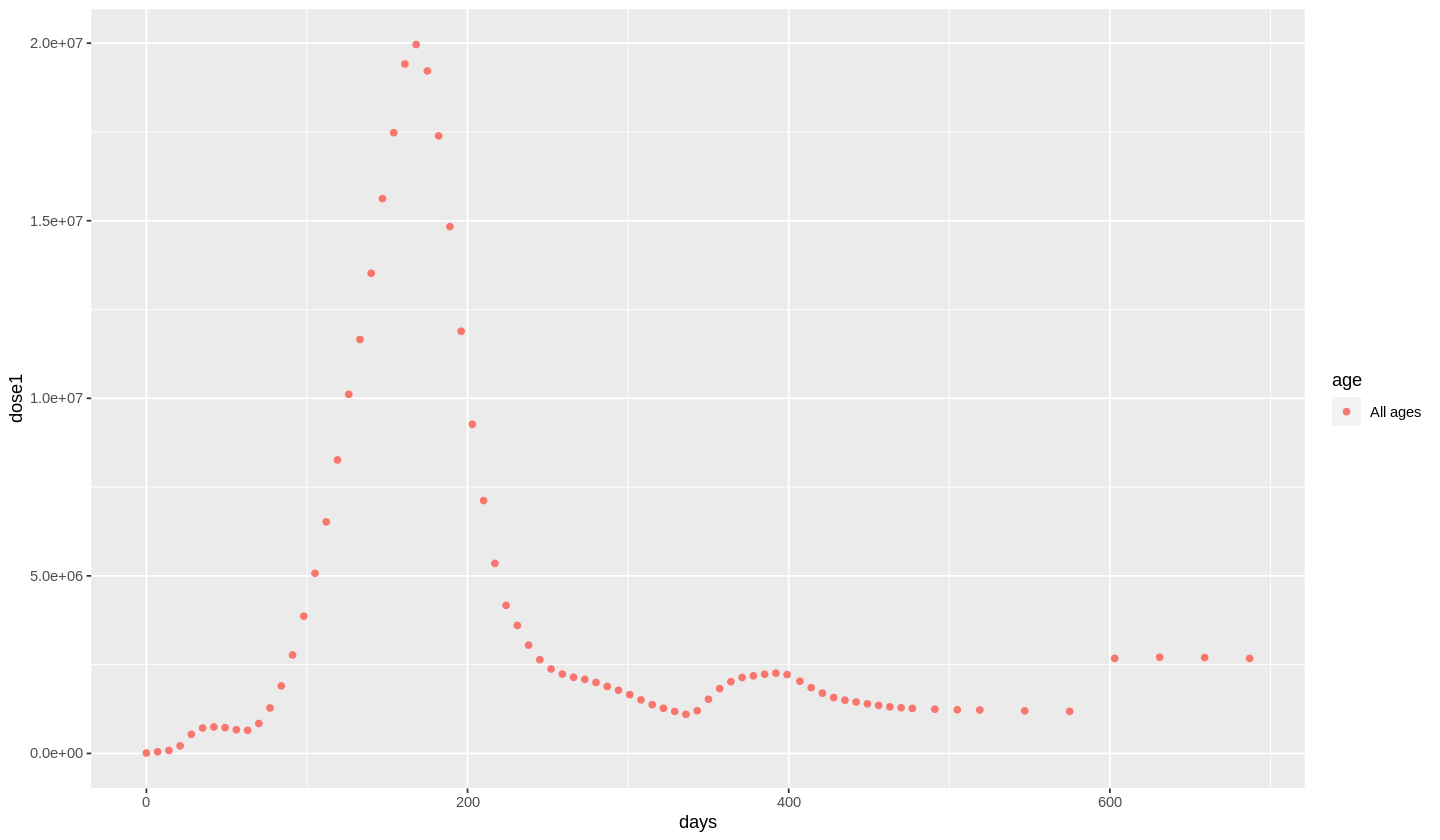

In [49]:
options(repr.plot.width = 12, repr.plot.height = 7)

x<-newnewdata$days
y<-newnewdata$dose1

bbb <- nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 90, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((aaa[1] - earlyx)/aaa[2]))

plot<- plot(ypred~earlyx)+
lines(x,predict(bbb))
plot

ggplot(newnewdata, aes(x=days,y=dose1))+
geom_point(aes(color=age))

## dose 2

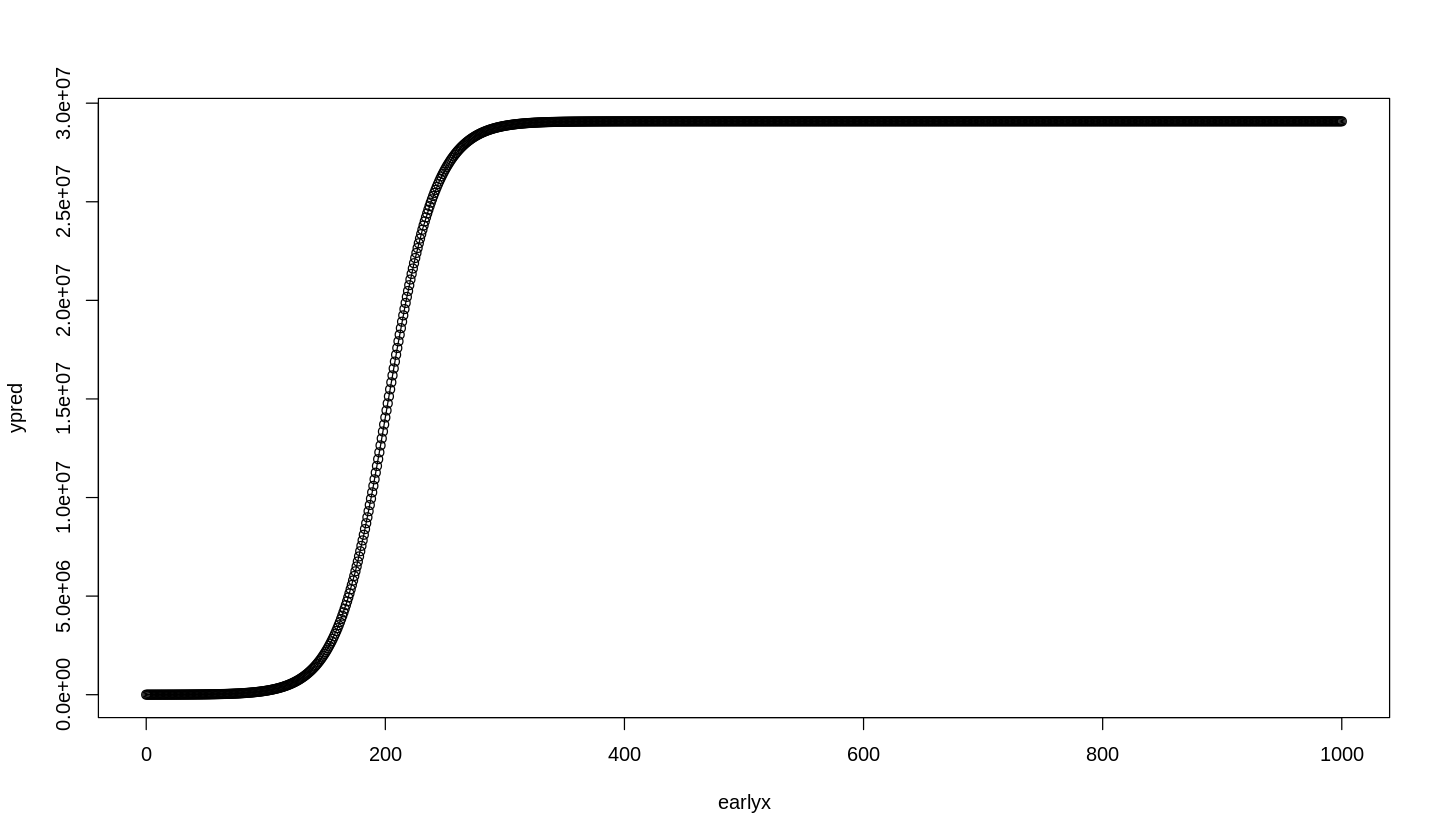

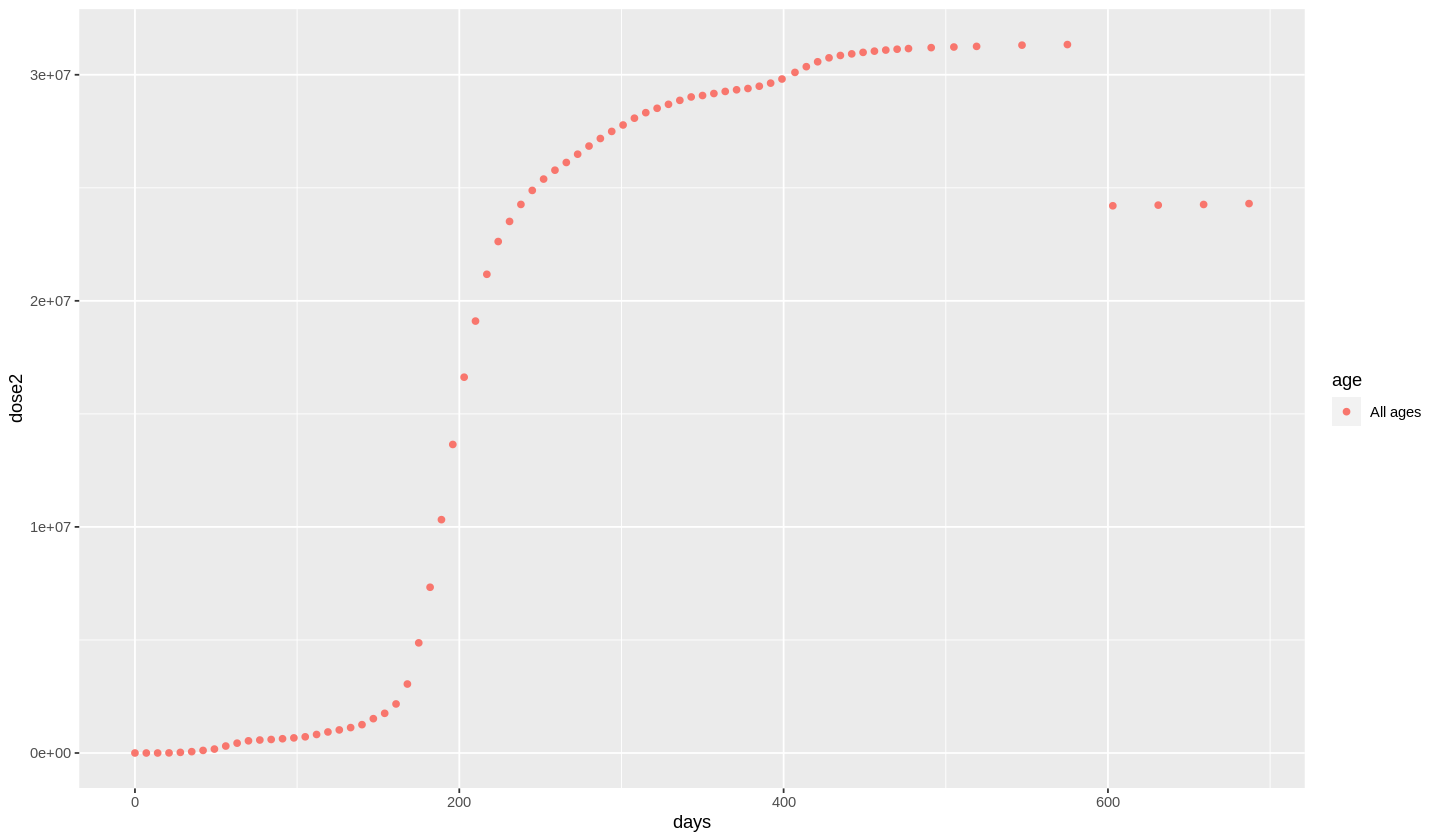

In [50]:
x<-newnewdata$days
y<-newnewdata$dose2

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 220, scal = 10, height = 30000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))
#predict(bbb)

ggplot(newnewdata, aes(x=days,y=dose2))+
geom_point(aes(color=age))

## dose 3

In [51]:
newnewdata3<-newnewdata|>filter(!is.na(dose3))

Warning message:
“Removed 51 rows containing missing values (geom_point).”


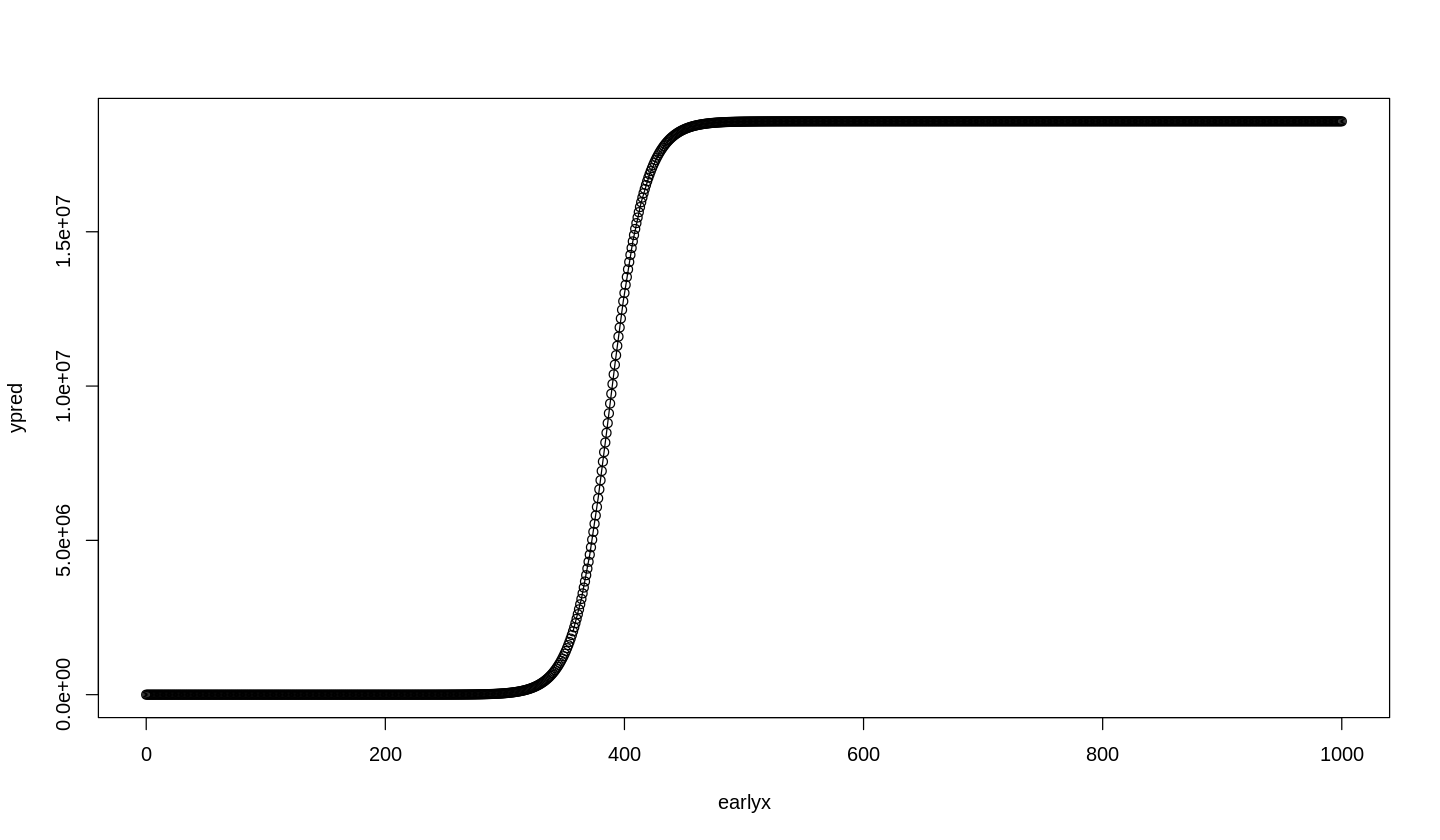

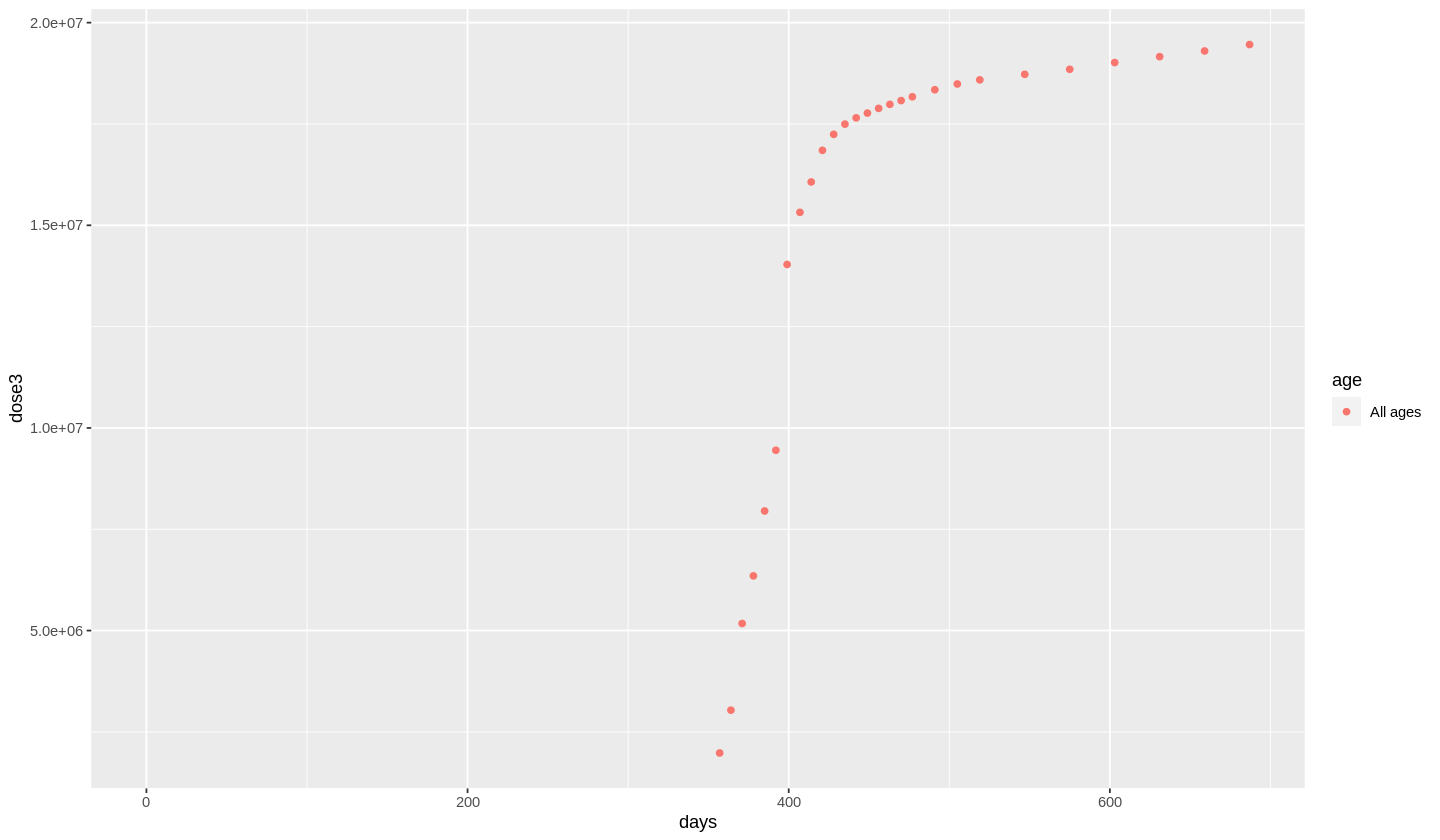

In [52]:
x<-newnewdata3$days
y<-newnewdata3$dose3

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 390, scal = 10, height = 20000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ggplot(newnewdata, aes(x=days,y=dose3))+
geom_point(aes(color=age))

## dose 4

In [53]:
newnewdata4<-newnewdata|>filter(!is.na(dose4))
newnewdata4

age,numtotal_atleast1dose,days,dose1,dose2,dose3,dose4,dose5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All ages,31892251,392,2261972,29630279,9448908,0,NA
All ages,32034414,399,2221858,29812556,14032975,0,NA
All ages,32139666,407,2034294,30105372,15319545,0,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
All ages,32285765,631,2709481,24234375,19161162,4214877,6649685
All ages,32321719,659,2699051,24262770,19300911,5608354,6686327
All ages,32355994,687,2676211,24302196,19459403,7274231,7741196


Warning message:
“Removed 56 rows containing missing values (geom_point).”


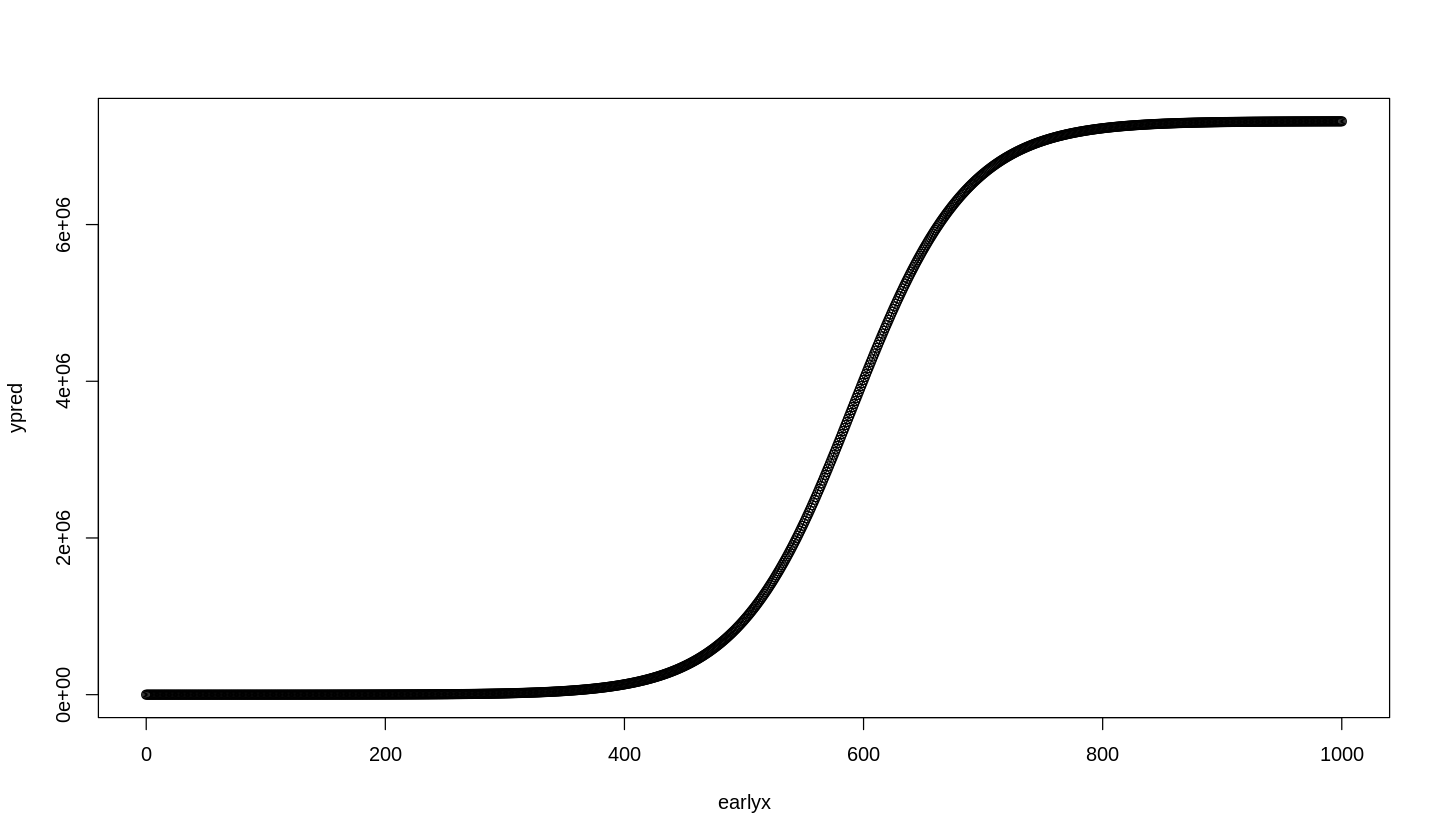

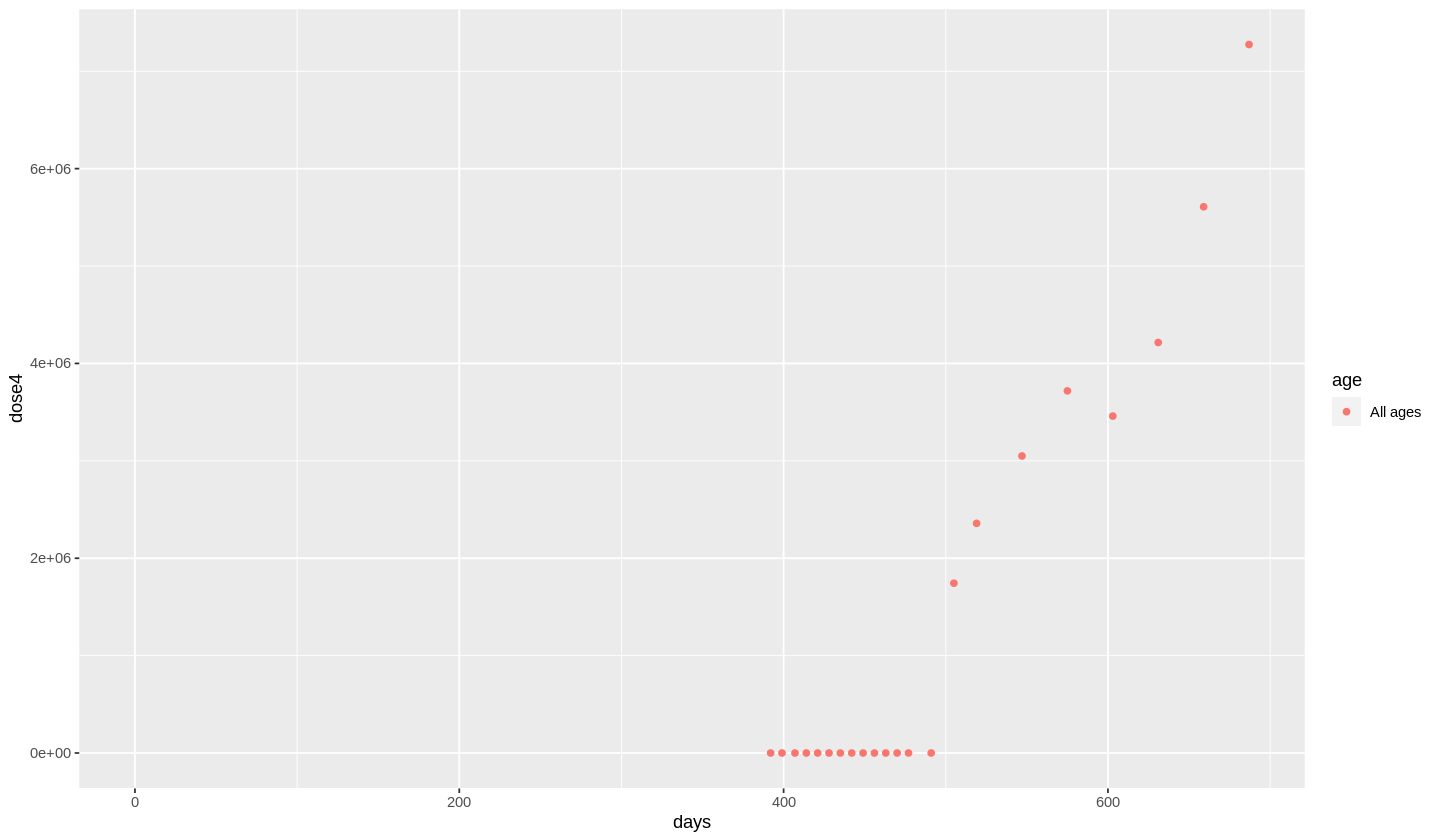

In [56]:
x<-newnewdata4$days
y<-newnewdata4$dose4 


options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)),
                           start = list(xmid = 620, scal = 10, height = 1500000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

ggplot(newnewdata, aes(x=days,y=dose4))+
geom_point(aes(color=age))

## dose 5

# A tibble: 4 × 8
  age      numtotal_atleast1dose  days   dose1    dose2    dose3   dose4   dose5
  <chr>                    <dbl> <dbl>   <dbl>    <dbl>    <dbl>   <dbl>   <dbl>
1 All ages              32208646   603 2678826 24205674 19015291 3459320 6600108
2 All ages              32285765   631 2709481 24234375 19161162 4214877 6649685
3 All ages              32321719   659 2699051 24262770 19300911 5608354 6686327
4 All ages              32355994   687 2676211 24302196 19459403 7274231 7741196


Warning message:
“Removed 74 rows containing missing values (geom_point).”


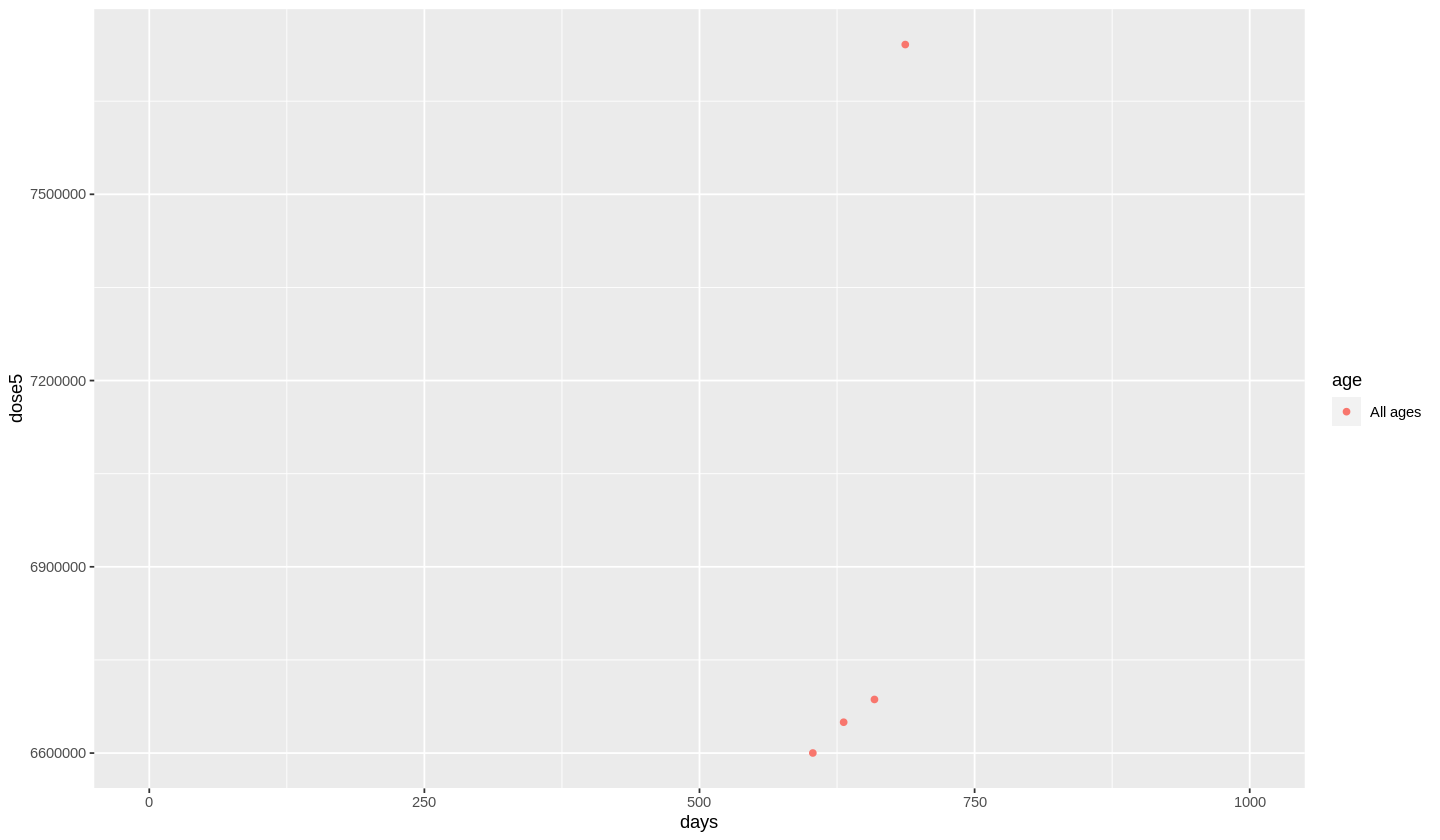

In [82]:
newnewdata5<-newnewdata|>filter(!is.na(dose5))
print(newnewdata5)
ggplot(newnewdata, aes(x=days,y=dose5))+
geom_point(aes(color=age))+
xlim(0,1000)

In [83]:
x<-newnewdata5$days
y<-newnewdata5$dose5
#plot(y~x)
options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 680, scal = 10, height = 7800000))
#bbb
aaa<- coef(bbb)
earlyx<-c(0:1000)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))

#ggplot(newnewdata, aes(x=days,y=dose5))+
#geom_point(aes(color=age))

ERROR: Error in nls(y ~ height/(1 + exp((xmid - x)/scal)), start = list(xmid = 680, : singular gradient


## finish

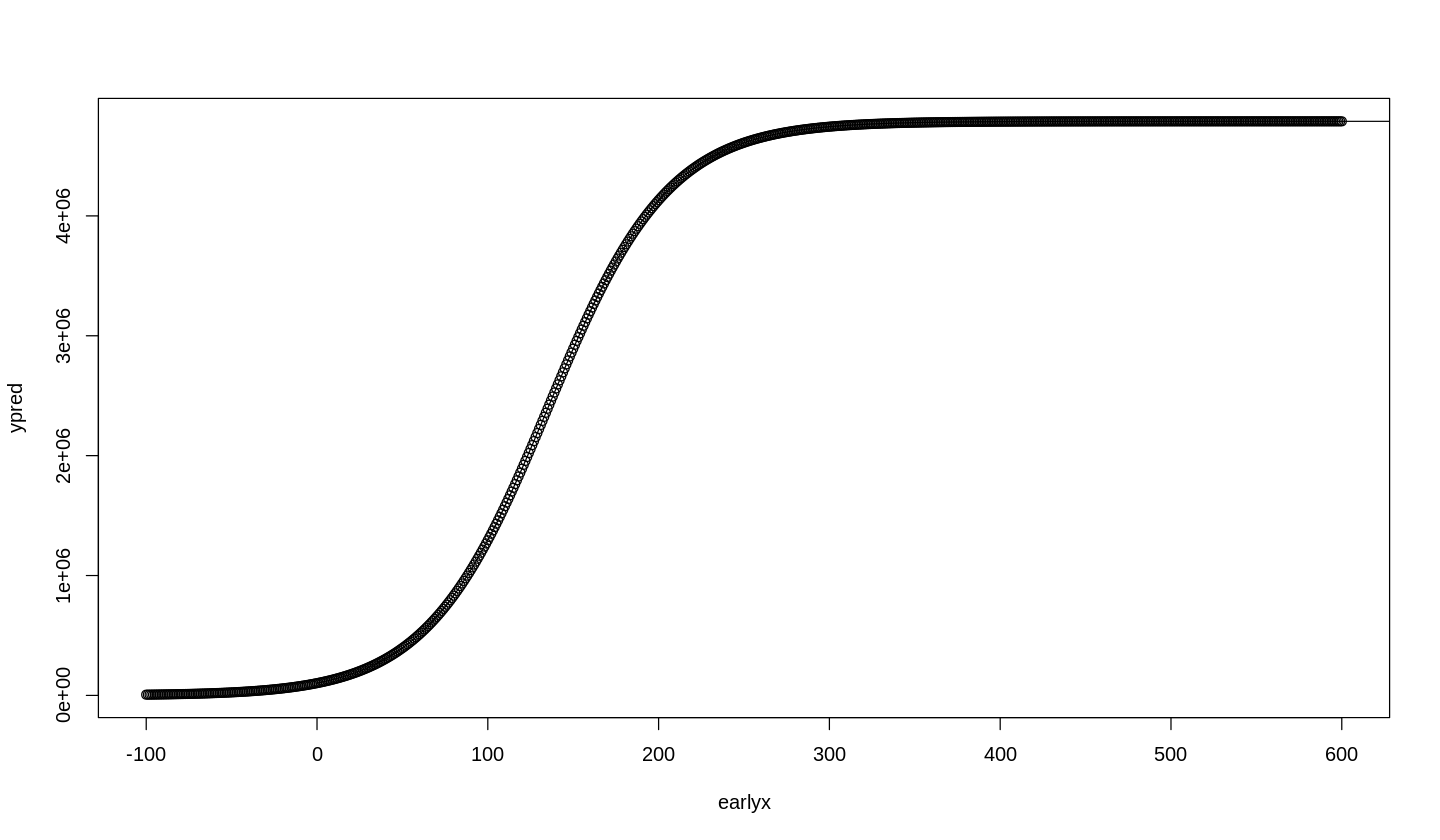

In [19]:
x<-newnewdata$days
y<-newnewdata$numtotal_atleast1dose

options(repr.plot.width = 12, repr.plot.height = 7)
bbb<-nls(y ~ height/(1 + exp((xmid - x)/scal)), 
                           start = list(xmid = 100, scal = 10, height = 5000000))
#bbb
aaa<- coef(bbb)
earlyx<-c(-100:600)
ypred<-aaa[3]/(1 + exp((coef(bbb)[1] - earlyx)/coef(bbb)[2]))
#ypred
plot(ypred~earlyx)
lines(x,predict(bbb))